In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pingouin import partial_corr
import pingouin as pg

In [34]:
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
do_gs_strat = True

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
if do_gs_strat:

    dfSEUS = pd.read_csv('../model_data/dataset_SE_US_coast_strat_gs.csv')
    
    dfEAus = pd.read_csv('../model_data/dataset_E_Aus_coast_strat_gs.csv')
    
    df = pd.read_csv('../model_data/dataset_SEUS_EAus_SCA_strat-by-gs.csv')

else:
    
    dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-08-31_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
    
    dfEAus = pd.read_csv('../model_data/dataset_Australia_East_coast_nostrat.csv')
    
    

In [4]:
df

,Unnamed: 0,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp
0,0,26.421083,-80.029462,0.119091,0.101041,1.102508,1.0,0.831507,66.096052,7.237247
1,1,26.421083,-80.029462,0.119091,0.101041,1.102508,1.0,0.831507,66.096052,7.237247
2,2,26.487303,-80.029535,0.119091,0.101041,1.102508,1.0,0.844971,66.432714,7.356747
3,3,26.553744,-80.029555,0.119091,0.101041,1.102508,1.0,0.842581,68.655992,7.379679
4,4,26.553970,-80.029535,0.119091,0.101041,1.102508,1.0,0.842581,68.655992,7.379679
...,...,...,...,...,...,...,...,...,...,...
955,955,33.420963,-117.618961,1.942912,0.065000,2.480865,2.0,0.765155,227.992884,13.720220
956,956,33.420963,-117.618961,1.942912,0.065000,2.480865,2.0,0.765155,227.992884,13.720220
957,957,33.420963,-117.618961,1.942912,0.065000,2.480865,2.0,0.765155,227.992884,13.720220
958,958,33.420963,-117.618961,1.942912,0.065000,2.480865,2.0,0.765155,227.992884,13.720220


In [5]:
df[df['code']==2]

,Unnamed: 0,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp
630,630,34.464047,-120.065836,0.198800,0.070,2.446613,2.0,0.514779,201.276899,13.207963
631,631,34.411070,-119.870687,0.214200,0.090,2.452912,2.0,0.498004,216.480709,12.468829
632,632,34.409532,-119.851605,0.213555,0.070,2.452912,2.0,0.425513,206.054231,12.522130
633,633,33.239558,-117.421040,0.206021,0.065,2.475991,2.0,0.819038,231.700024,14.094658
634,634,33.576053,-117.840340,0.214877,0.070,2.485209,2.0,0.653808,221.567094,12.969022
...,...,...,...,...,...,...,...,...,...,...
955,955,33.420963,-117.618961,1.942912,0.065,2.480865,2.0,0.765155,227.992884,13.720220
956,956,33.420963,-117.618961,1.942912,0.065,2.480865,2.0,0.765155,227.992884,13.720220
957,957,33.420963,-117.618961,1.942912,0.065,2.480865,2.0,0.765155,227.992884,13.720220
958,958,33.420963,-117.618961,1.942912,0.065,2.480865,2.0,0.765155,227.992884,13.720220


In [6]:
df[df['code']==1]

,Unnamed: 0,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp
0,0,26.421083,-80.029462,0.119091,0.101041,1.102508,1.0,0.831507,66.096052,7.237247
1,1,26.421083,-80.029462,0.119091,0.101041,1.102508,1.0,0.831507,66.096052,7.237247
2,2,26.487303,-80.029535,0.119091,0.101041,1.102508,1.0,0.844971,66.432714,7.356747
3,3,26.553744,-80.029555,0.119091,0.101041,1.102508,1.0,0.842581,68.655992,7.379679
4,4,26.553970,-80.029535,0.119091,0.101041,1.102508,1.0,0.842581,68.655992,7.379679
...,...,...,...,...,...,...,...,...,...,...
325,325,32.570188,-80.122632,1.060826,0.033361,2.153022,1.0,0.337398,145.507827,7.061092
326,326,32.527018,-80.200799,1.060826,0.081640,2.249190,1.0,0.485446,140.718329,7.217885
327,327,32.525460,-80.198369,1.060826,0.028486,2.183564,1.0,0.494115,135.915570,7.211110
328,328,32.603477,-80.056235,1.060826,0.033361,2.153022,1.0,0.321616,148.369763,6.851339


In [7]:
df[df['code']==0]

,Unnamed: 0,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp
330,330,-30.193444,153.172102,0.1189,0.051706,1.888537,0.0,1.635126,117.605902,8.932381
331,331,-30.063280,153.202346,0.1575,0.051842,1.893666,0.0,1.635126,117.605902,8.932381
332,332,-29.309966,153.351347,0.1723,0.051432,1.941419,0.0,1.585693,117.720732,9.064267
333,333,-30.105618,153.200360,0.1590,0.050374,1.893642,0.0,1.635126,117.605902,8.932381
334,334,-30.105618,153.200360,0.1590,0.050374,1.893642,0.0,1.635126,117.605902,8.932381
...,...,...,...,...,...,...,...,...,...,...
625,625,-30.253344,153.141572,0.6475,0.115477,1.888787,0.0,1.635126,117.605902,8.932381
626,626,-30.253344,153.141572,0.6475,0.115477,1.888787,0.0,1.635126,117.605902,8.932381
627,627,-33.530366,151.366710,0.6797,0.074289,1.749925,0.0,1.434097,131.464542,8.956954
628,628,-30.253344,153.141572,0.6475,0.115477,1.888787,0.0,1.635126,117.605902,8.932381


In [9]:
Xus = pg.pairwise_corr(
    df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy()[df['code']==1], 
    columns=['d50'], 
    method='spearman', 
    alternative='greater', 
    padjust='bonf').round(3)


Xca = pg.pairwise_corr(
    df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy()[df['code']==2], 
    columns=['d50'], 
    method='spearman', 
    alternative='greater', 
    padjust='bonf').round(3)

Xoz = pg.pairwise_corr(
    df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy()[df['code']==0], 
    columns=['d50'], 
    method='spearman', 
    alternative='greater', 
    padjust='bonf').round(3)

X = pg.pairwise_corr(
    df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), 
    columns=['d50'], 
    method='spearman', 
    alternative='greater', 
    padjust='bonf').round(3)

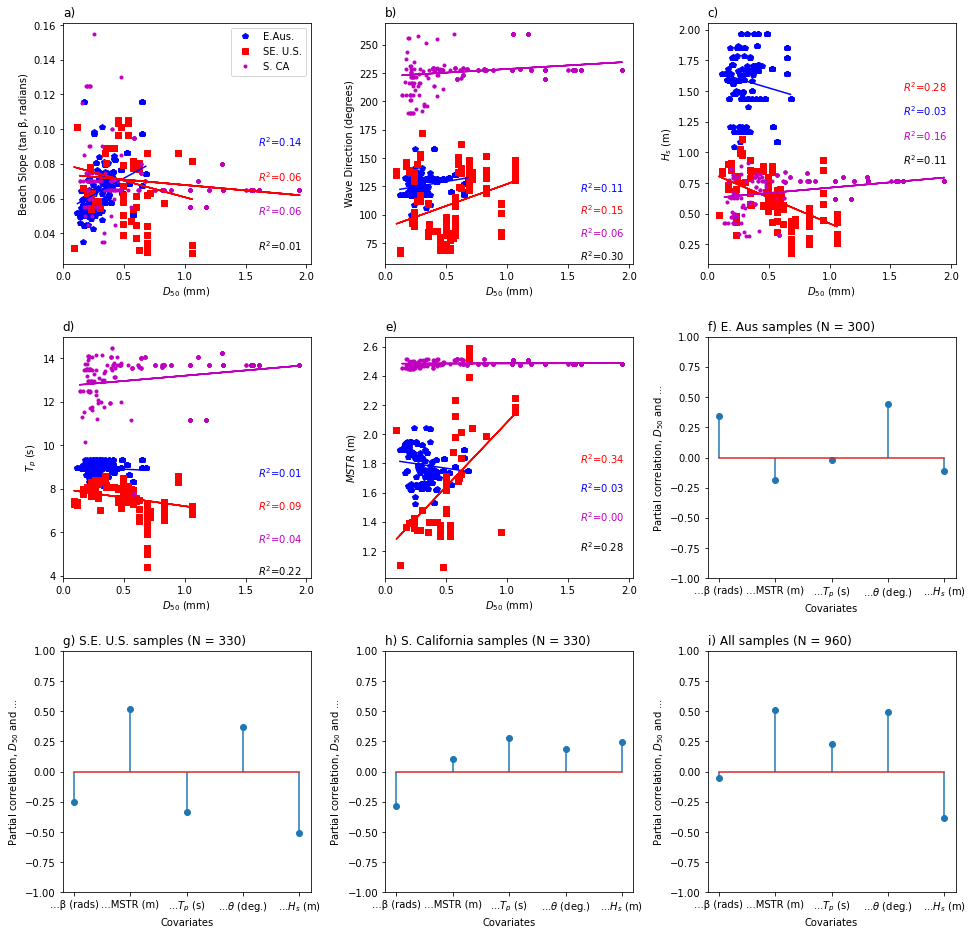

In [32]:
plt.figure(figsize=(16,16))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#######################
plt.subplot(331)
plt.plot(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0],'bp', label='E.Aus.')
plt.plot(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1],'rs', label='SE. U.S.')
plt.plot(df['d50'][df['code']==2], df['beach_slope_average'][df['code']==2],'m.', label='S. CA')

plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Beach Slope (tan β, radians)')
plt.title("a)", loc='left')
plt.legend(loc=1)

# coef = np.polyfit(df['d50'], df['beach_slope_average'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')


coef = np.polyfit(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

coef = np.polyfit(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

coef = np.polyfit(df['d50'][df['code']==2], df['beach_slope_average'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-m')

coef = np.polyfit(df['d50'][df['code']==2], df['beach_slope_average'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,.09,r'$R^2$='+str(r2)[:4], color='b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,.07,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], df['beach_slope_average'][df['code']==2]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,.05,r'$R^2$='+str(r2)[:4], color='m')

r2 = np.min(np.corrcoef(df['d50'], df['beach_slope_average']))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,.03,r'$R^2$='+str(r2)[:4])


#######################
plt.subplot(332)
plt.plot(df['d50'][df['code']==0], df['dir'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['dir'][df['code']==1],'rs')
plt.plot(df['d50'][df['code']==2], df['dir'][df['code']==2],'m.')

plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Wave Direction (degrees)')
plt.title("b)", loc='left')

# coef = np.polyfit(df['d50'], df['dir'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

coef = np.polyfit(df['d50'][df['code']==0], df['dir'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

coef = np.polyfit(df['d50'][df['code']==1], df['dir'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

coef = np.polyfit(df['d50'][df['code']==2], df['dir'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-m')


r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['dir'][df['code']==0]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,120,r'$R^2$='+str(r2)[:4], color='b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['dir'][df['code']==1]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,100,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], df['dir'][df['code']==2]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,80,r'$R^2$='+str(r2)[:4], color='m')

r2 = np.min(np.corrcoef(df['d50'], df['dir']))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,60,r'$R^2$='+str(r2)[:4])


#######################
plt.subplot(333)
plt.plot(df['d50'][df['code']==0], df['hs_mean'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['hs_mean'][df['code']==1],'rs')
plt.plot(df['d50'][df['code']==2], df['hs_mean'][df['code']==2],'m.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("c)", loc='left')

# coef = np.polyfit(df['d50'], df['hs_mean'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')


coef = np.polyfit(df['d50'][df['code']==0], df['hs_mean'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['hs_mean'][df['code']==0]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.3,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['hs_mean'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

coef = np.polyfit(df['d50'][df['code']==2], df['hs_mean'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-m')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['hs_mean'][df['code']==1]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.5,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], df['hs_mean'][df['code']==2]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.1,r'$R^2$='+str(r2)[:4], color='m')

r2 = np.min(np.corrcoef(df['d50'], df['hs_mean']))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,.9,r'$R^2$='+str(r2)[:4])


#######################
plt.subplot(334)
plt.plot(df['d50'][df['code']==0], df['tp'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['tp'][df['code']==1],'rs')
plt.plot(df['d50'][df['code']==2], df['tp'][df['code']==2],'m.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T_{p}$ (s)')
plt.title("d)", loc='left')

# coef = np.polyfit(df['d50'], df['tp'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

coef = np.polyfit(df['d50'][df['code']==0], df['tp'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['tp'][df['code']==0]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,8.5,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['tp'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

coef = np.polyfit(df['d50'][df['code']==2], df['tp'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-m')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['tp'][df['code']==1]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,7,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], df['tp'][df['code']==2]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,5.5,r'$R^2$='+str(r2)[:4], color='m')

r2 = np.min(np.corrcoef(df['d50'], df['tp']))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,4,r'$R^2$='+str(r2)[:4])


#######################
plt.subplot(335)
plt.plot(df['d50'][df['code']==0],df['mstr'][df['code']==0] ,'bp')
plt.plot(df['d50'][df['code']==1],df['mstr'][df['code']==1] ,'rs')
plt.plot(df['d50'][df['code']==2],df['mstr'][df['code']==2] ,'m.')

plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$MSTR$ (m)')
plt.title("e)", loc='left')

# coef = np.polyfit(df['d50'], df['mstr'],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')


coef = np.polyfit(df['d50'][df['code']==0], df['mstr'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['mstr'][df['code']==0]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.6,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['mstr'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

coef = np.polyfit(df['d50'][df['code']==2], df['mstr'][df['code']==2],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==2], poly1d_fn(df['d50'][df['code']==2]), '-m')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['mstr'][df['code']==1]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.8,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], df['mstr'][df['code']==2]))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0  
plt.text(1.6,1.4,r'$R^2$='+str(r2)[:4], color='m')

r2 = np.min(np.corrcoef(df['d50'], df['mstr']))**2
if r2>1:
    r2=0.0
elif r2<.001:
    r2=0.0 
plt.text(1.6,1.2,r'$R^2$='+str(r2)[:4])


#######################
ax = plt.subplot(336)
plt.stem(Xoz['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"f) E. Aus samples (N = {})".format(len(df[df['code']==0])), loc='left')

#######################
ax = plt.subplot(337)
plt.stem(Xus['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"g) S.E. U.S. samples (N = {})".format(len(df[df['code']==1])), loc='left')

#######################
ax = plt.subplot(338)
plt.stem(Xca['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"h) S. California samples (N = {})".format(len(df[df['code']==2])), loc='left')

#######################
ax = plt.subplot(339)
plt.stem(X['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"i) All samples (N = {})".format(len(df)), loc='left')

plt.savefig('../data_plots/SEUS_EAus_SCali_d50-linreg-partcorrel.jpg', dpi=300, bbox_inches='tight')

In [25]:
def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)

def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

In [26]:
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/df['beach_slope_average'],df['hs_mean'])])

a = -0.154
b = -0.145
c = 0.268

ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in df['beach_slope_average']])

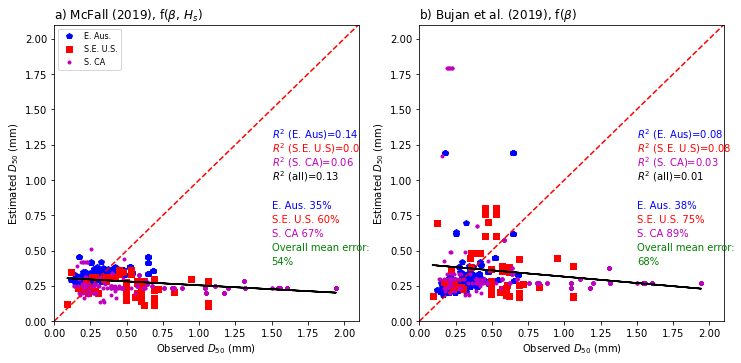

In [31]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(221)
plt.plot(df['d50'][df['code']==0], ds_est_baseline[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est_baseline[df['code']==1], 'rs', label='S.E. U.S.')
plt.plot(df['d50'][df['code']==2], ds_est_baseline[df['code']==2], 'm.', label='S. CA')
plt.xlim(0,2.1); plt.ylim(0,2.1)

yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) McFall (2019), f($\beta$, $H_s$)", loc='left')

r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline))**2
plt.text(1.5,1.0,r'$R^2$ (all)='+str(r2)[:4], color='k')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], ds_est_baseline[df['code']==1]))**2
r2=0.0
plt.text(1.5,1.2,r'$R^2$ (S.E. U.S)='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], ds_est_baseline[df['code']==0]))**2
if r2>1:
    r2=0.0
plt.text(1.5,1.3,r'$R^2$ (E. Aus)='+str(r2)[:4], color='b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], ds_est_baseline[df['code']==2]))**2
if r2>1:
    r2=0.0
plt.text(1.5,1.1,r'$R^2$ (S. CA)='+str(r2)[:4], color='m')

coef = np.polyfit(df['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.legend(fontsize=8)

plt.text(1.5,.5, r'Overall mean error:', color='g')
plt.text(1.5,.4, r'{}%'.format(str(np.mean(prc_err(df['d50'], ds_est_baseline)))[:2]), color='g')
plt.text(1.5,.8, r'E. Aus. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==0], ds_est_baseline[df['code']==0])))[:2]), color='b')
plt.text(1.5,.7, r'S.E. U.S. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==1], ds_est_baseline[df['code']==1])))[:2]), color='r')
plt.text(1.5,.6, r'S. CA {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==2], ds_est_baseline[df['code']==2])))[:2]), color='m')


plt.subplot(222)
# plt.plot(df['d50'], ds_est_baseline2, 'k.', label=r"")
plt.plot(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1], 'rs', label='S.E. U.S.')
plt.plot(df['d50'][df['code']==2], ds_est_baseline2[df['code']==2], 'm.', label='S. CA')

plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) Bujan et al. (2019), f($\beta$)", loc='left')

r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline2))**2
plt.text(1.5,1.0,r'$R^2$ (all)='+str(r2)[:4], color='k')

coef = np.polyfit(df['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
# plt.legend(fontsize=8, loc=0)

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1]))**2
if r2>1:
    r2=0.0
plt.text(1.5,1.2,r'$R^2$ (S.E. U.S)='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0]))**2
if r2>1:
    r2=0.0
plt.text(1.5,1.3,r'$R^2$ (E. Aus)='+str(r2)[:4], color='b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==2], ds_est_baseline2[df['code']==2]))**2
if r2>1:
    r2=0.0
plt.text(1.5,1.1,r'$R^2$ (S. CA)='+str(r2)[:4], color='m')

plt.text(1.5,.5, r'Overall mean error:', color='g')
plt.text(1.5,.4, r'{}%'.format(str(np.mean(prc_err(df['d50'], ds_est_baseline2)))[:2]), color='g')

# plt.text(.72,.6, r'Overall mean error:', color='g')
plt.text(1.5,.8, r'E. Aus. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0])))[:2]), color='b')
plt.text(1.5,.7, r'S.E. U.S. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1])))[:2]), color='r')
plt.text(1.5,.6, r'S. CA {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==2], ds_est_baseline2[df['code']==2])))[:2]), color='m')


plt.savefig('../model_plots/SEUS-EOz_SCali_d50-baseline-skill.jpg', dpi=300, bbox_inches='tight')

In [108]:
dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')

In [75]:
dfOzCG = pd.read_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_strat_gs.csv')
dfOzW = pd.read_csv('../model_data/dataset_Australia_W_coast_strat_gs.csv')
dfOzNW = pd.read_csv('../model_data/dataset_Australia_NW_coast_strat_gs.csv')
dfOzNE = pd.read_csv('../model_data/dataset_Australia_NE_coast_strat_gs.csv')
dfOzSE = pd.read_csv('../model_data/dataset_Australia_SE_coast_strat_gs.csv')
dfOzS = pd.read_csv('../model_data/dataset_Australia_S_coast_strat_gs.csv')

In [155]:
dfNI = pd.read_csv('../model_data/dataset_NI.csv')

In [156]:
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

In [157]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

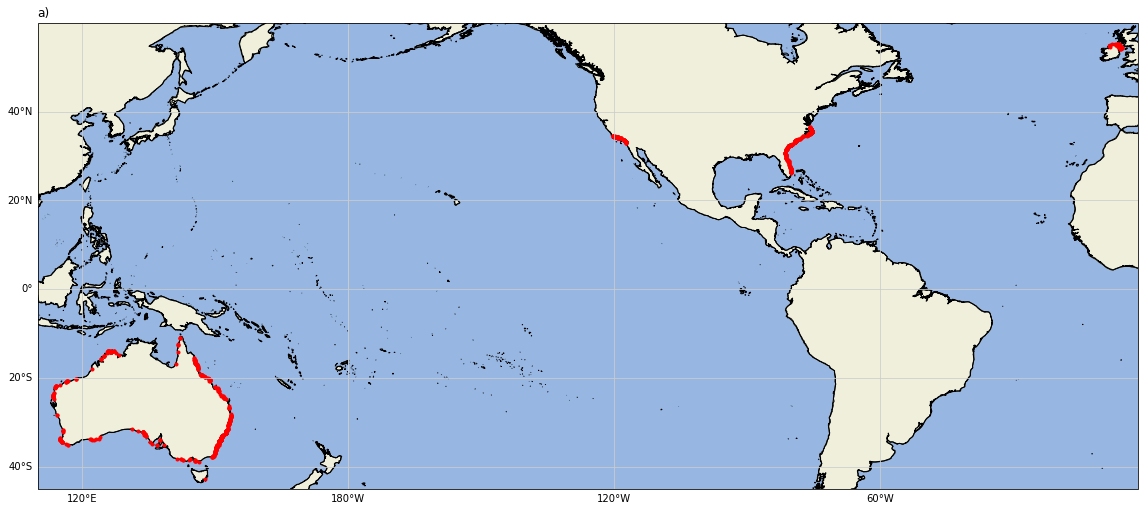

In [181]:
vmin = 0.01
vmax = 1.1
label = r'Observed $D_{50}$'
title = 'a)'
outfile = '../model_input_plots/All_d50-observed.jpg'

fig=plt.figure(figsize=(16,16))
cm = 180
proj = ccrs.PlateCarree(central_longitude=cm)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines()

# original ax.set_extent((-120, 120, -45, 45)) ?
# Need longitude extent from -60 to +60 on PlateCarree(central_longitude=180)
minlon = -70 + cm
maxlon = +178 + cm
ax.set_extent([minlon, maxlon, -45, 60], ccrs.PlateCarree())
# ax.gridlines(draw_labels=True, crs=proj)
# ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)#, zorder=100)
# ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
# ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8', crs=ccrs.PlateCarree())

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

ax.plot(dfOz['longitude'],dfOz['latitude'],'r.',transform=ccrs.PlateCarree(), label='Primary dataset')

ax.plot(df['longitude'],df['latitude'], 'r.',transform=ccrs.PlateCarree(), label='Secondary dataset')

ax.plot(dfNI['longitude'],dfNI['latitude'], 'r.',transform=ccrs.PlateCarree())

# ax.plot(dfOzW['longitude'],dfOzW['latitude'],'g.',transform=ccrs.PlateCarree())
# ax.plot(dfOzNW['longitude'],dfOzNW['latitude'],'g.',transform=ccrs.PlateCarree())
# ax.plot(dfOzNE['longitude'],dfOzNE['latitude'],'g.',transform=ccrs.PlateCarree())
# # ax.plot(dfOzSE['longitude'],dfOzSE['latitude'],'b.',transform=ccrs.PlateCarree())
# ax.plot(dfOzS['longitude'],dfOzS['latitude'],'g.',transform=ccrs.PlateCarree())

plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()

plt.savefig(outfile, dpi=300, bbox_inches='tight')

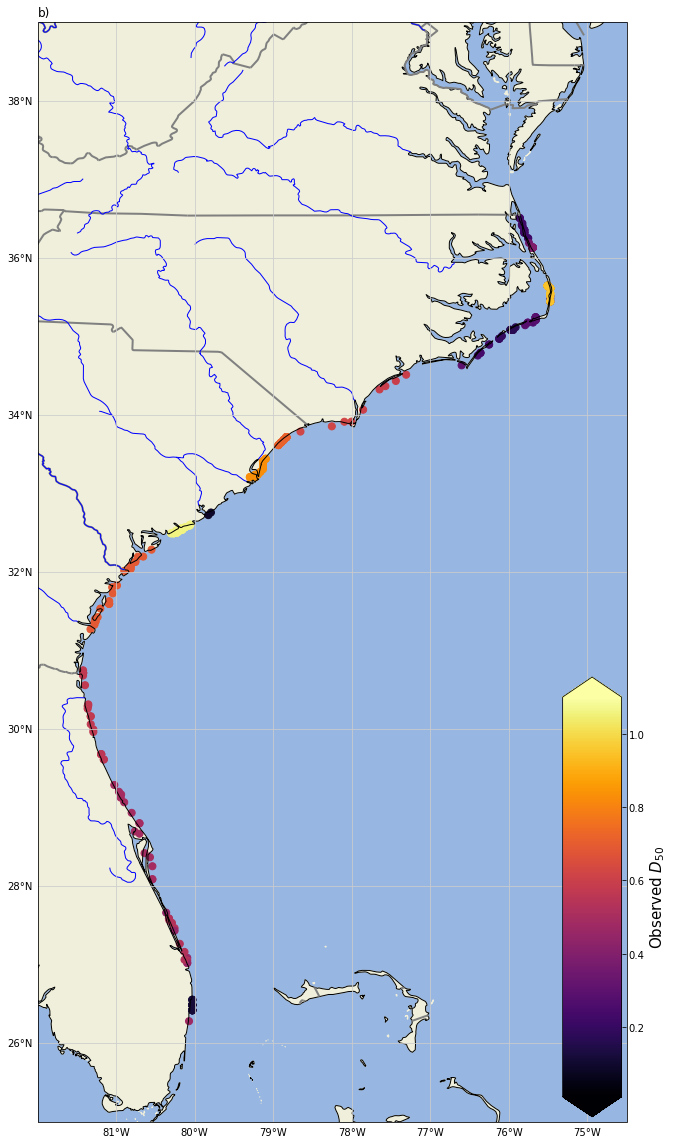

In [180]:
vmin = 0.01
vmax = 1.1
label = r'Observed $D_{50}$'
title = 'b)'
outfile = '../model_input_plots/SEUS_d50-observed.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,df['d50'], cmap='inferno', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

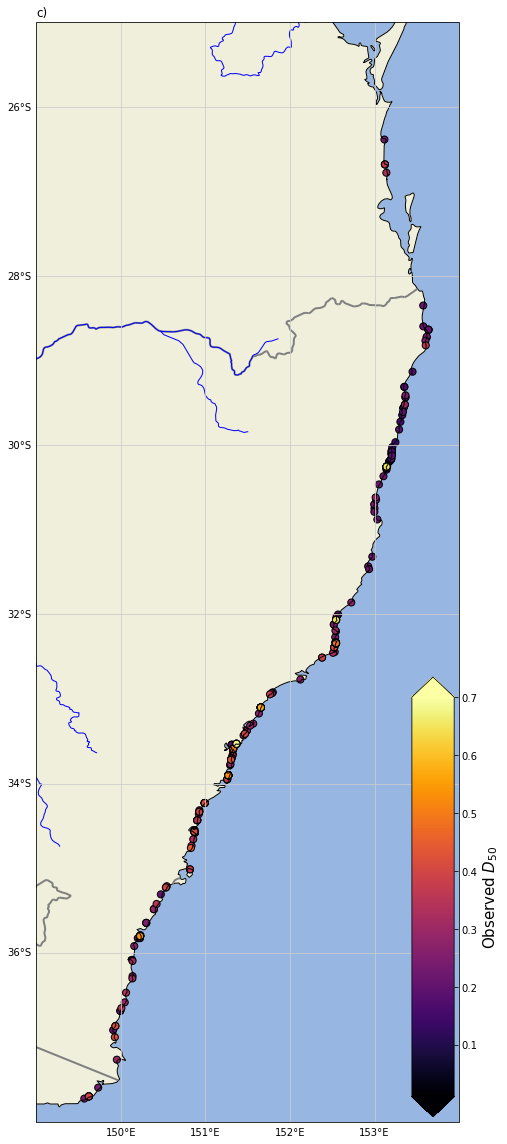

In [179]:
# -40, -25
# 149, 155

vmin = 0.01
vmax = .7
label = r'Observed $D_{50}$'
title = 'c)'
outfile = '../model_input_plots/EAus_d50-observed.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([149, 154, -38, -25], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,df['d50'], cmap='inferno', #'inferno', 'plasma', 'magma', 'cividis'
            vmin=vmin, vmax=vmax, lw=1,edgecolors='black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

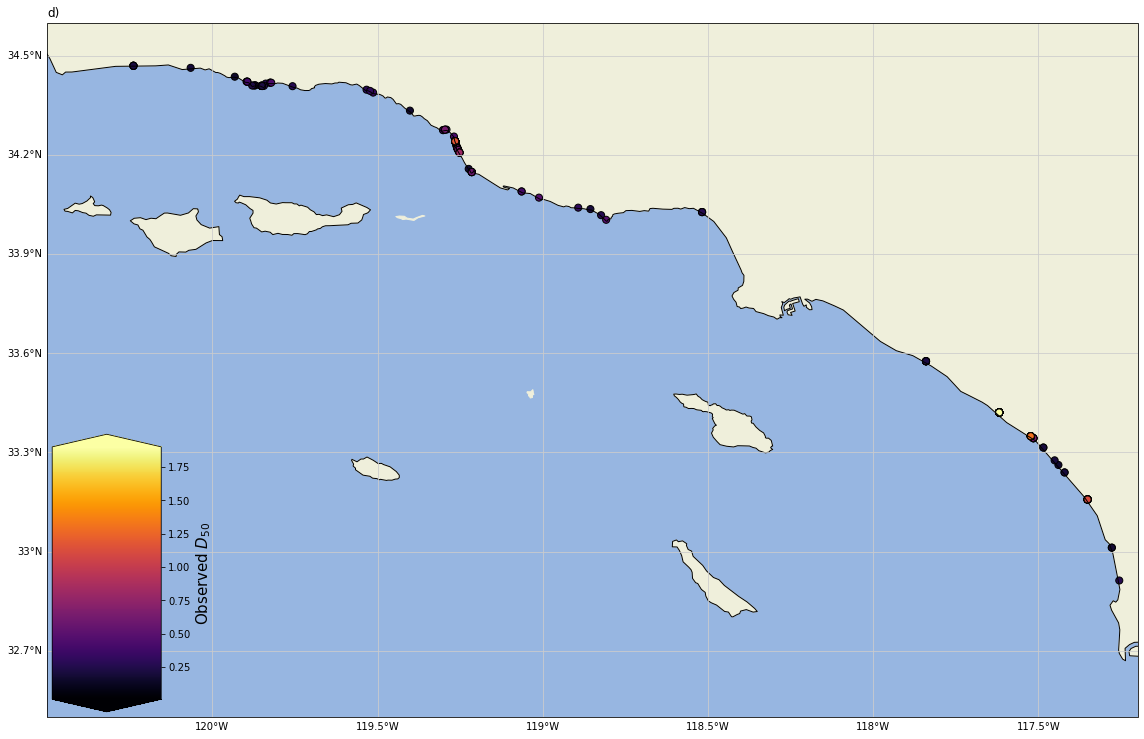

In [178]:
vmin = 0.01
vmax = 1.9
label = r'Observed $D_{50}$'
title = 'd)'
outfile = '../model_input_plots/SCA_d50-observed.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-117.2, -120.5, 32.5, 34.6], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,df['d50'], cmap='inferno', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors='black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=3) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

In [163]:
dfNI['longitude'].min()

-8.443956

In [168]:
dfNI['d50'].mean()

0.21836000000000005

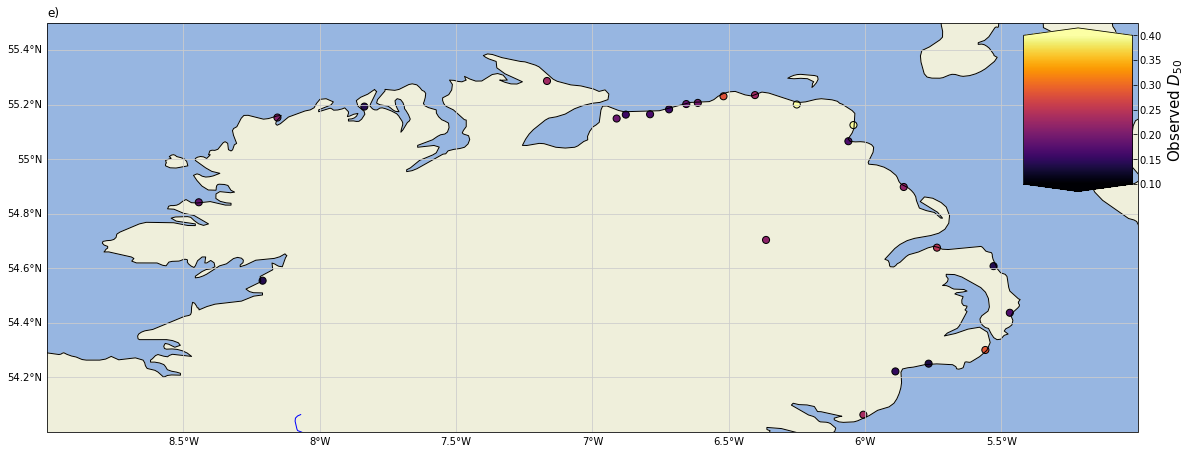

In [177]:
vmin = 0.1
vmax = 0.4
label = r'Observed $D_{50}$'
title = 'e)'
outfile = '../model_input_plots/NIre_d50-observed.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,16))
ax = plt.axes(projection=crs)
ax.set_extent([-9, -5, 54, 55.5], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_feature(cfeature.LAND)#, zorder=100)
# ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(dfNI['longitude'],dfNI['latitude'],50,dfNI['d50'], cmap='inferno', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors='black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=1) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

In [33]:
# X = np.vstack((df['mstr'],df['beach_slope_average']))

# X = X[:,~np.isnan(X).any(axis=0)]

# plt.figure(figsize=(12,12))
# plt.subplot(221)
# plt.plot(X[0,:],X[1,:], 'r.')

# ind = np.where(X[0,:]>=1)[0]
# X = X[:,ind]

# X.shape
# plt.plot(X[0,:],X[1,:], 'ko')

# plt.ylabel(r'tan β')
# plt.xlabel(r'MSTR')
# plt.title(r"a)", loc='left')
# r2 = np.min(np.corrcoef(X[0,:],X[1,:]))**2
# plt.text(2,.1,r'$R^2$='+str(r2)[:4])

# coef = np.polyfit(X[0,:],X[1,:],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(X[0,:], poly1d_fn(X[0,:]), '-k')

# # plt.savefig('data_plots/Partial_correl_a.jpg', dpi=300, bbox_inches='tight')